In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [4]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data=pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],index_col='date',date_parser=dateparse)['demandas']

C:\Users\marcio\AppData\Local\Temp\ipykernel_10132\2516921193.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


$d_{i} = 100+10\cos\left(\frac{2\pi\left(i+10\right)}{50}+0.6\pi\right)+e_{i}$

$e_{i} \sim N\left(0,1\right)$

$i=1,...,52$

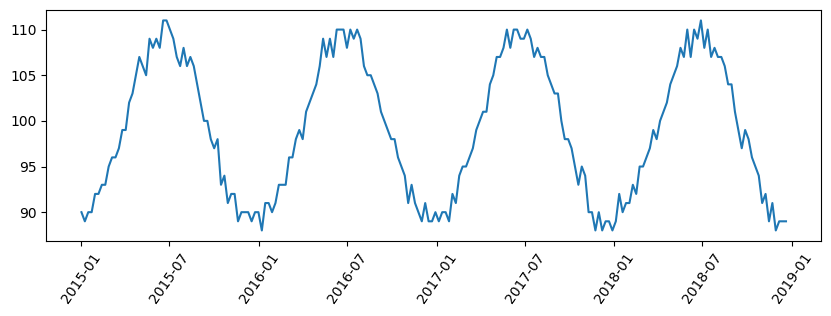

In [5]:
fig=plt.figure(figsize=(10,3))


ax=fig.add_subplot(1,1,1)


plt.plot(data)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

'''
ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(data,orientation='horizontal',alpha = 0.4)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
'''
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Demandas.png', format='png', bbox_inches='tight',pad_inches = 0.1)

# Correlação

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


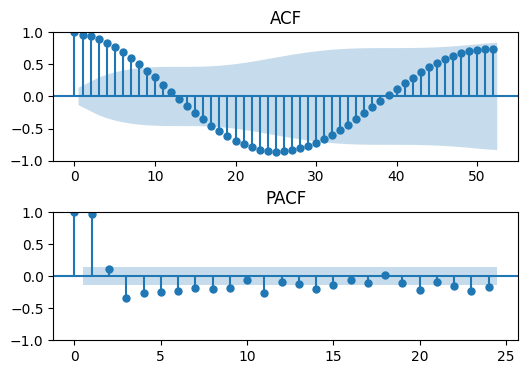

In [6]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(data,title='ACF',lags=52,alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(data,title='PACF',ax=ax)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ACF_PACF.png', bbox_inches='tight',pad_inches = 0.1,format='png')

plt.show()

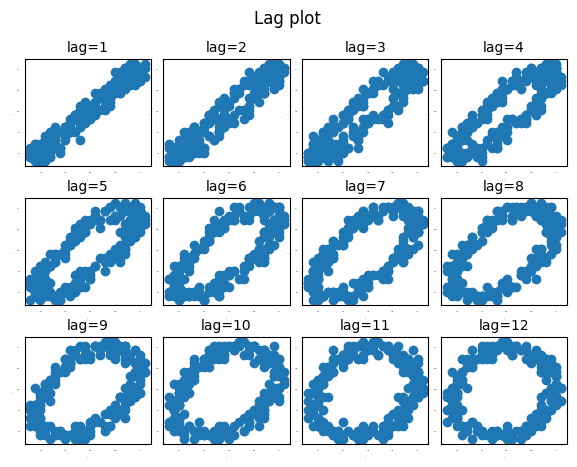

In [7]:
fig=plt.figure(figsize=(7,5))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Lag plot')

for i in range(12):
    ax=fig.add_subplot(3,4,i+1)
    pd.plotting.lag_plot(data, lag=i+1)
    plt.title(f"lag={i+1}",fontsize=10)
    plt.tick_params(axis='y', labelsize=0, length=0)
    plt.tick_params(axis='x', labelsize=0, length=0)
    plt.xlabel([], fontsize=0)
    plt.ylabel([], fontsize=0)


plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/LagPlot.png', format='png', bbox_inches='tight',pad_inches = 0.1)
plt.show(block=True)

# Decomposição

In [8]:
decom = seasonal_decompose(data)

## Sazonalidade

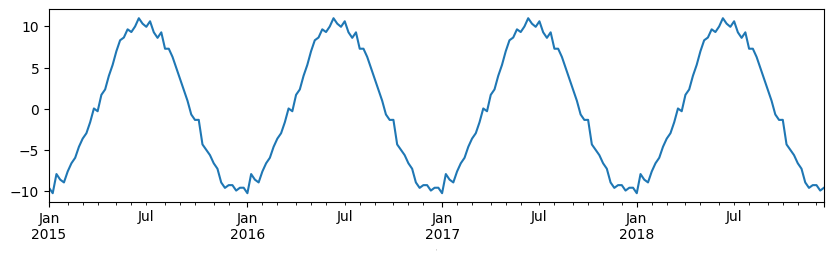

In [9]:
decom.seasonal.plot(figsize=(10,2.5))
plt.xlabel([], fontsize=0)
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Sazonal.png', format='png', bbox_inches='tight',pad_inches = 0.1)

<AxesSubplot: xlabel='date'>

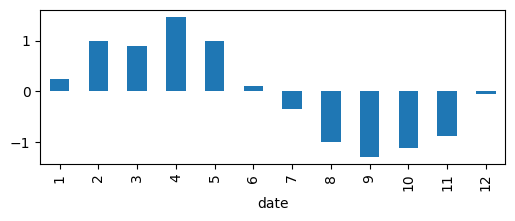

In [10]:
fig=plt.figure(figsize=(6,2))
data.diff().groupby(data.index.month).mean().plot(kind='bar')

## Resíduo

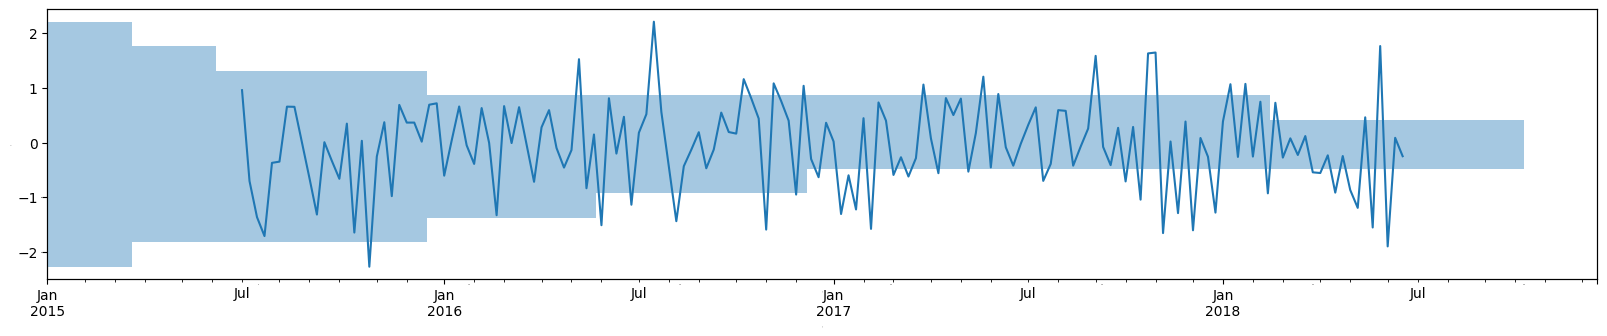

In [11]:
fig=plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=-1, hspace=0)


ax=fig.add_subplot(1,2,1)
decom.resid.plot(figsize=(20,3.5))
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(decom.resid,orientation='horizontal',alpha = 0.4)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Ruido.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Tendência

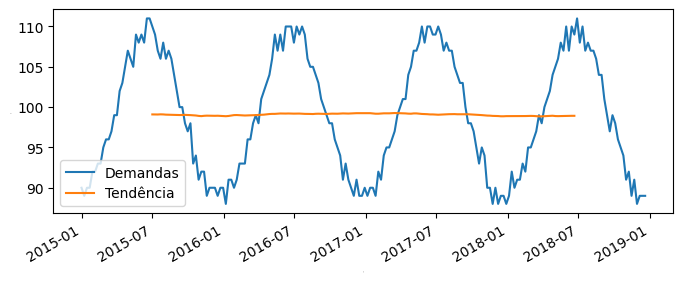

In [12]:
fig=plt.figure(figsize=(8,3))
plt.plot(data,label='Demandas')
decom.trend.plot(label='Tendência')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Tendencia.png', format='png', bbox_inches='tight',pad_inches = 0.1)

# Teste de Estacionariedade

In [22]:
result = adfuller(data) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')   

for key, value in result[4].items():     
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.046982
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


In [29]:
result = kpss(data) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')   

for key, value in result[3].items():     
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.039276
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Médias Móveis

In [ ]:
media_movel = data.rolling(3).mean()

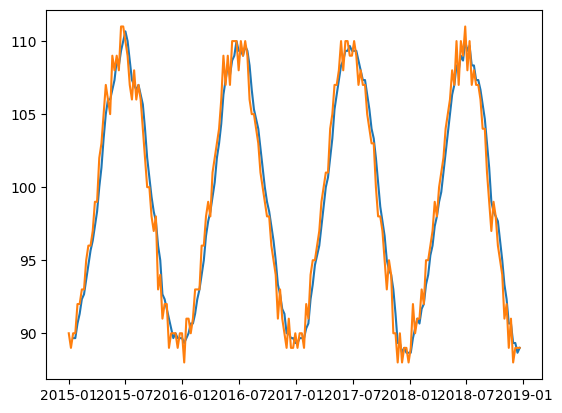

In [ ]:
plt.plot(media_movel)
plt.plot(data)